In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mstats
import matplotlib.pyplot as plt
import seaborn as sns
import pystan
%matplotlib inline
plt.style.use("ggplot")

In [2]:
data = pd.read_csv('./input/data-poisson-binomial.txt')
data.head()

,Y
0,6
1,5
2,8
3,2
4,5


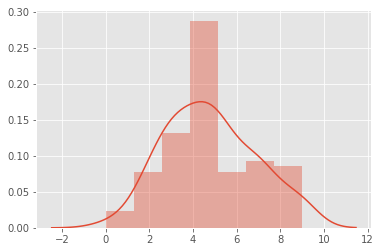

In [3]:
sns.distplot(data)

In [4]:
stan_model = """

data{
  int N;
  int M_max;
  int<lower=0> Y[N];
}

parameters {
  real<lower=0> lambda;
}

model {
  for (n in 1:N){
    vector[M_max-Y[n]+1] lp;
    for (m in Y[n]:M_max){
      lp[m-Y[n]+1] = poisson_lpmf(m | lambda) + binomial_lpmf(Y[n] | m, 0.5);
    }
    target += log_sum_exp(lp);
  }
}

"""

In [5]:
sm = pystan.StanModel(model_code=stan_model)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_0bbddba7a7adb948055332477525e19e NOW.


In [6]:
stan_data = {}
stan_data['N'] = data.shape[0]
stan_data['M_max'] = 40
stan_data['Y'] = data['Y']

In [7]:
fit = sm.sampling(stan_data)

In [8]:
fit

Inference for Stan model: anon_model_0bbddba7a7adb948055332477525e19e.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

         mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
lambda   9.58    0.01   0.43   8.76   9.27   9.58   9.87  10.42   1524    1.0
lp__   -211.9    0.01   0.68 -213.9 -212.1 -211.7 -211.5 -211.4   2082    1.0

Samples were drawn using NUTS at Thu Apr 30 15:14:16 2020.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).

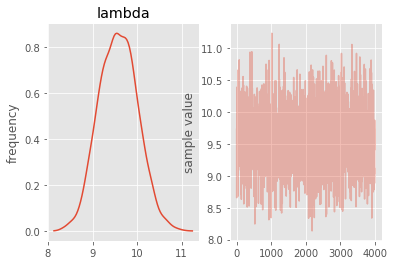

In [9]:
fig = fit.plot()